In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pdfkit

In [ ]:
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tabulate import tabulate
#import pdfkit

In [ ]:
# Set parameters
county_name = 'Los Angeles'
month = '/'.join(['Rough', 'Data_05_2021', '21_05'])
data_path = '/content/drive/My Drive/Stanford Law 3XP/Data'
code_path = '/content/drive/My Drive/Stanford Law 3XP/Code'

In [ ]:
# Get summary data
el_adult = pd.read_excel('/'.join([data_path, county_name, month, 'summary_adult.xlsx']))
el_juv = pd.read_excel('/'.join([data_path, county_name, month, 'summary_juvenile.xlsx']))

In [ ]:
case_summary_cols = ['Controlling Offense', 'Offense Begin Date', 'Aggregate Sentence in Months', 'Sentence Type', 'Birthday', 'Sex Registrant',
                     'Current Convictions']

prison_summary_cols = ['CDCR #', 'Current Classication Score', 'Classification Score 5 Years Ago', 'CSRA', 'Programming',
                       'DPPV Disability - Mobility', 'DPPV Disability - Hearing', 'DPPV Disability - Vision', 'DPPV Disability - Speech',
                       'Mental Health Level of Care', 'Rules Violations', 'Prior Convictions']

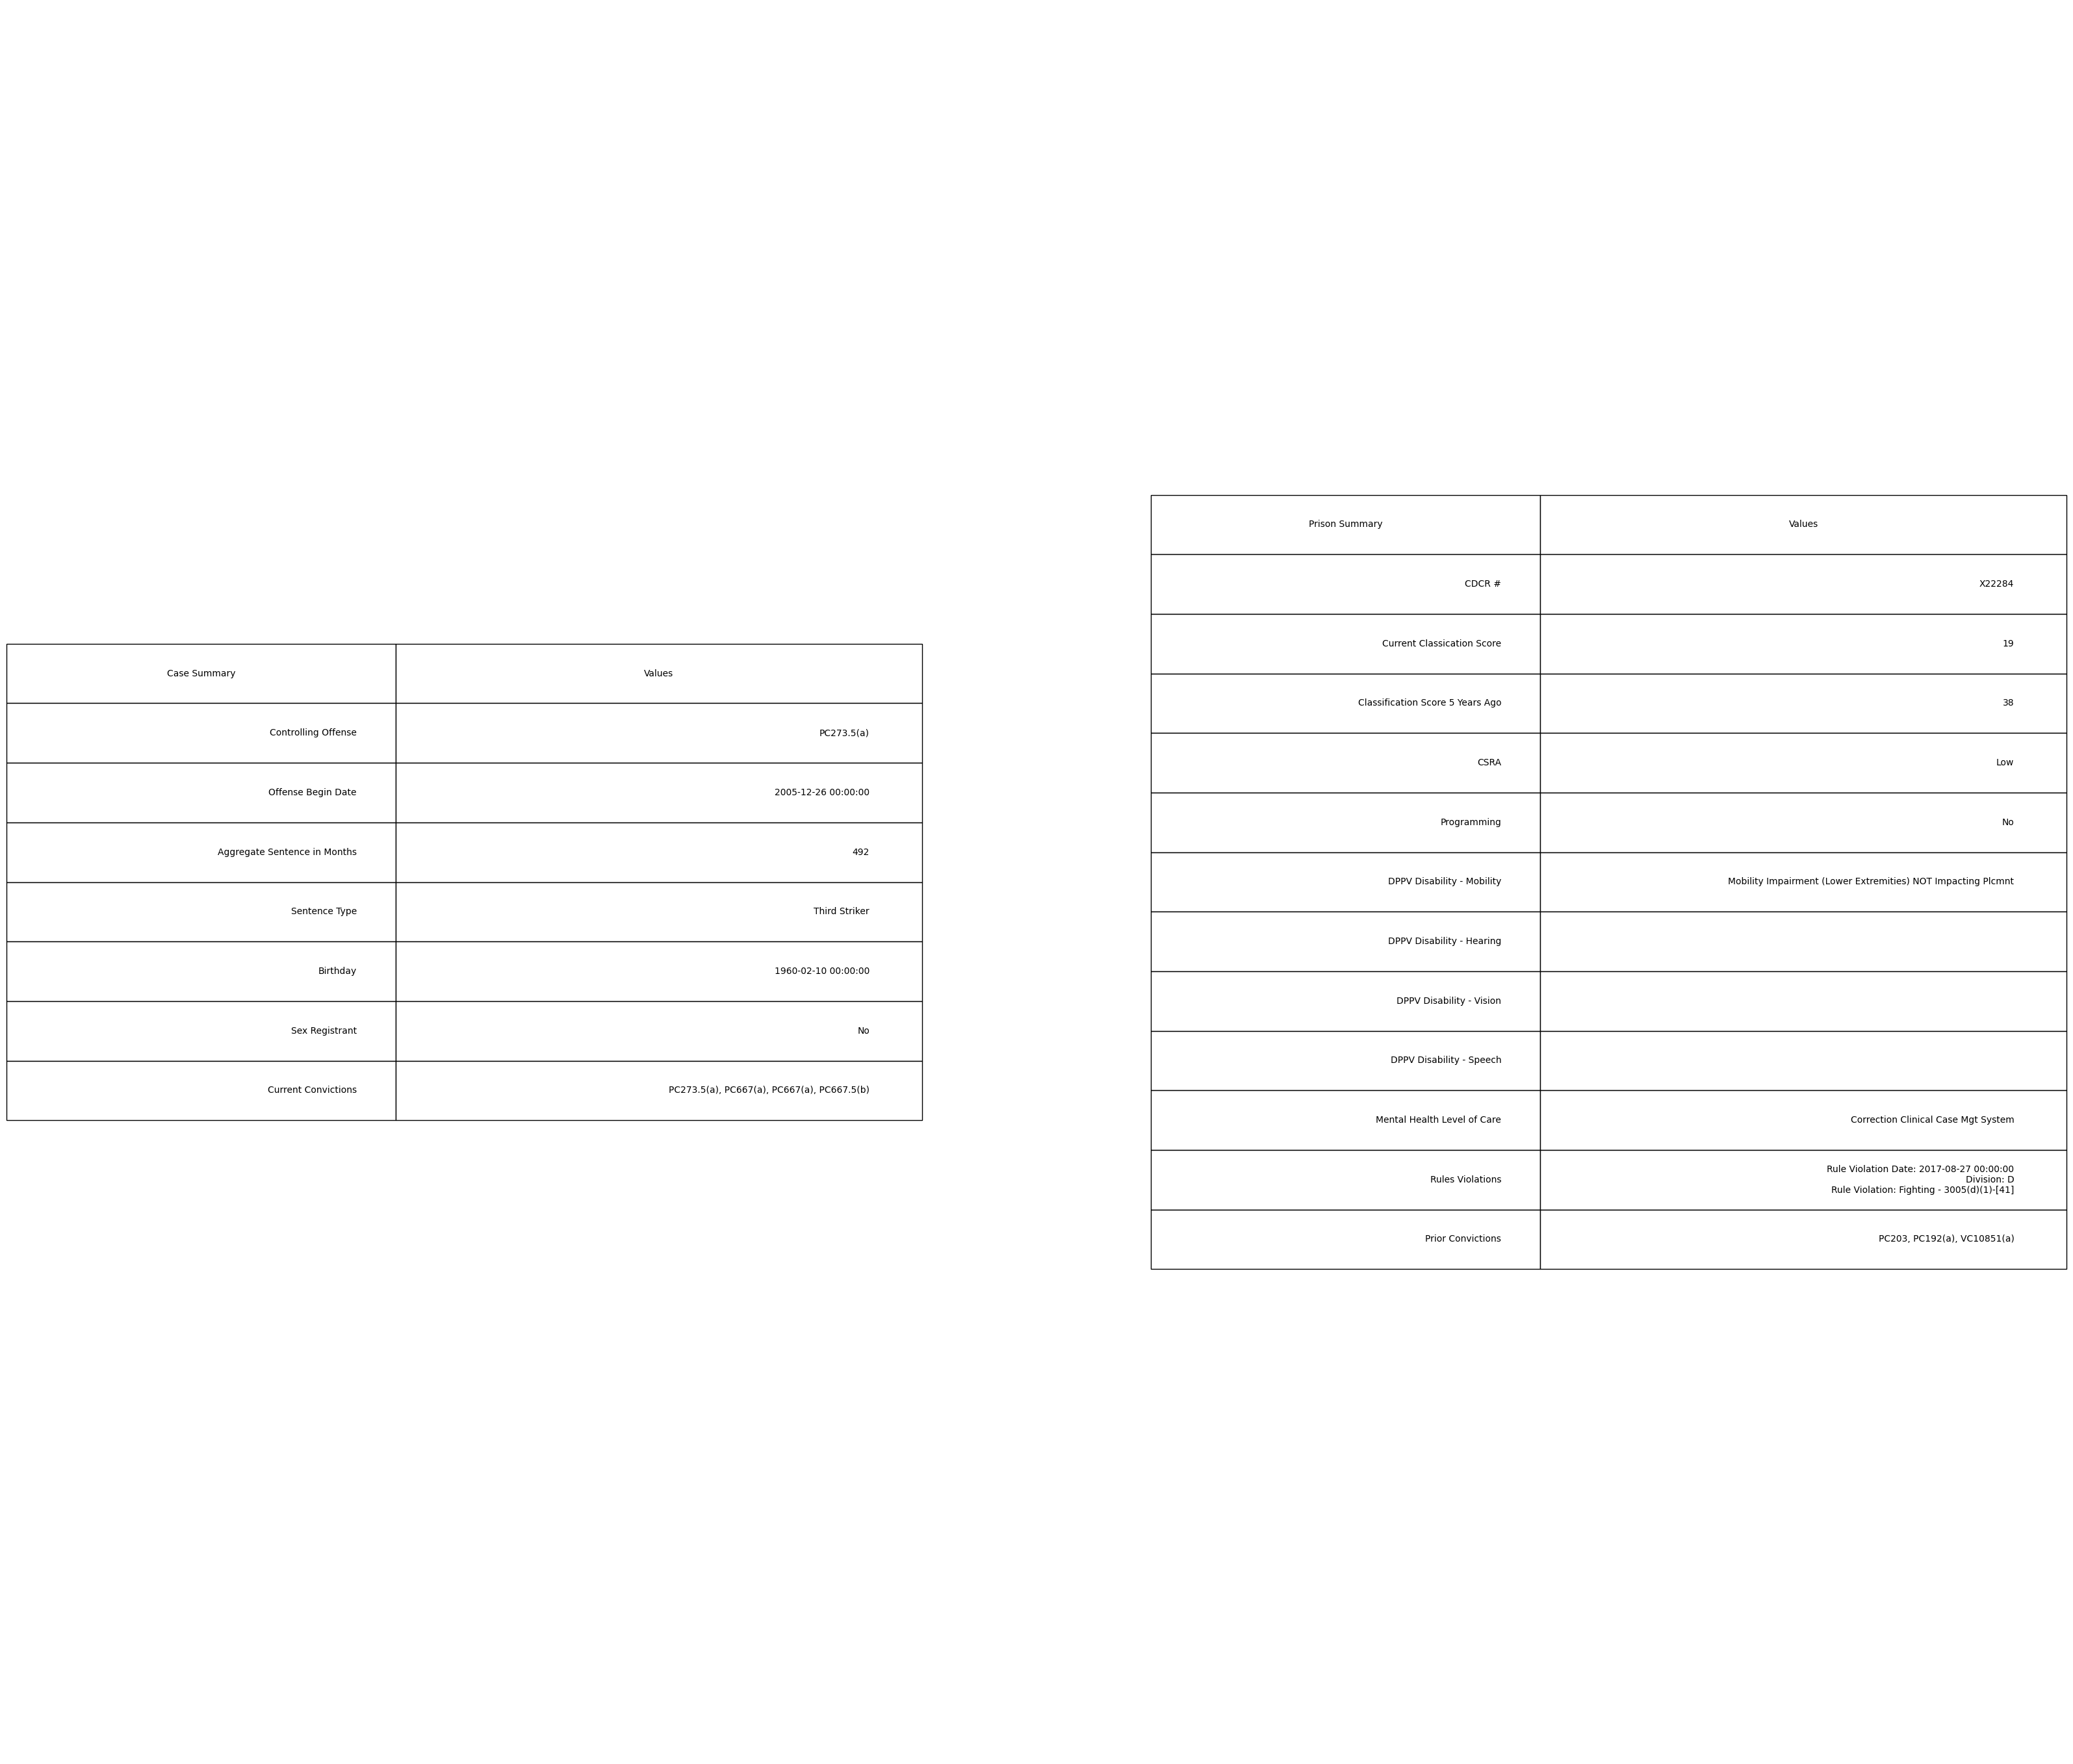

In [ ]:
# Generate sample
val = el_adult.iloc[0]
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,35))
fig.patch.set_visible(False)

ax1.axis('off')
ax1.axis('tight')
ax2.axis('off')
ax2.axis('tight')

# Case summary
the_table = ax1.table(cellText = [[col, val.loc[col]] for col in case_summary_cols],
                     colLabels = ['Case Summary', 'Values'],
                     colWidths= [1.7,2.3],
                     fontsize = 25,
                     loc = 'left')
the_table.auto_set_font_size(False)
the_table.scale(1,5.5)

the_table = ax1.table(cellText = [[col, val.loc[col]] for col in prison_summary_cols],
                      colLabels = ['Prison Summary', 'Values'],
                      fontsize = 25,
                      colWidths=[1.7,2.3],
                      loc = 'right')

the_table.auto_set_font_size(False)
the_table.scale(1,5.5)
#fig.tight_layout()

In [ ]:
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [ ]:
val = el_adult.values.tolist()

In [ ]:
print(tabulate(val[0:3],headers='firstrow',tablefmt='grid'))

In [ ]:
html_code = tabulate(val[0:5],headers='firstrow',tablefmt='html')

In [ ]:
path_wkthmltopdf = "C:/Program Files/wkhtmltopdf"
config = pdfkit.configuration(wkhtmltopdf = path_wkthmltopdf)

In [ ]:
pdfkit.from_string(html_code, "string.pdf", verbose=True)
print("="*50)